<a href="https://colab.research.google.com/github/Alirezamirbagheri/emotor-assembly-inspection-ml/blob/main/emotor-assembly-inspection-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
side  top


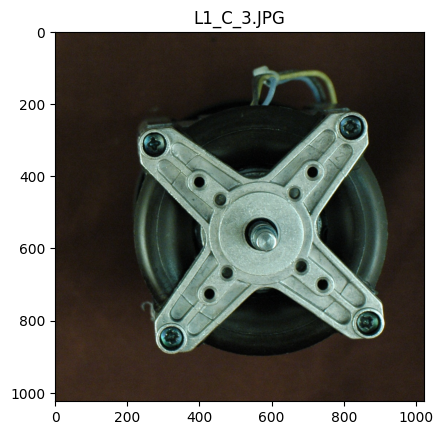

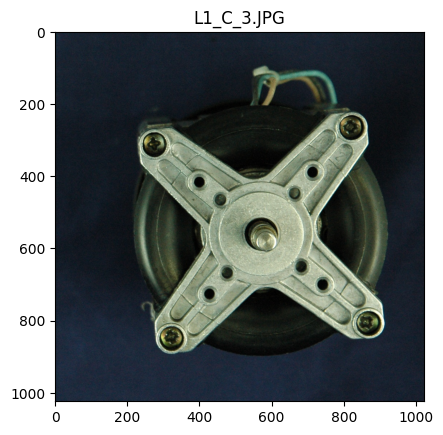

Number of features: 117
Number of labels: 117


NameError: name 'quality_gate_111' is not defined

In [16]:
# Mounting the Gdrive
from google.colab import drive
from google.colab.patches import cv2_imshow
import sys, os
drive.mount('/content/gdrive', force_remount=True)

# Changing and adjusting the working directory = should be customized
dir_path = '/content/gdrive/My Drive/ML/Image_Classification/EMotor_Inspection'
sys.path.append(dir_path)
os.chdir(dir_path)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import cv2
import tensorflow as tf
# from scripts.check import *
!ls "/content/gdrive/My Drive/ML/Image_Classification/EMotor_Inspection/data"
# Loading one image in the top view
path = "./data/top/L1_C_3.JPG"
img = cv2.imread(path)
img.shape
type(img)

# Now we want to plot the image
plt.title(path.split('/')[-1]) # Set the filename as image title
plt.imshow(img) # Display the image
plt.show()

# By default, open cv assumes the images are encoded in BGR.
# However, the actual order of the color channels is BRG. Thus, the channels need to be converted
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert image from bgr to rgb
plt.title(path.split('/')[-1]) # Set the filename as image title
plt.imshow(img) # Display the image
plt.show()

# 1: we need to load all the available images from the given data folder *folder*. Besides the image, we need to also find the class of the respective image.
#The information of the class is encoded in the title of each image. You can use the helper function `get_label_from_name(path)` to parse the filename to the class.

import glob

def get_label_from_name(path):
    if "_C_" in path:
        return "Complete"
    if "_MC_" in path:
        return "Missing cover"
    if "_MS_" in path:
        return "Missing screw"
    if "_NS_" in path:
        return "Not screwed"
    return "n/a" # TODO: Raise error

def load_features_labels(folder, size = (64,32), flatten = True, color = False, identifiers=['NS', 'MS', 'MC', 'C']):
    features, labels = [], [] # Empty lists for storing the features and labels

    # Iterate over all imagefiles in the given folder
    for file in glob.glob(folder + "/*.JPG"):
        if any(identifier in file for identifier in identifiers):
            # Load image
            if color:
                img = cv2.imread(file, cv2.IMREAD_COLOR)  # shape: (h, w, 3)
            else:
                img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # shape: (h, w)

            if img is None:
                print(f"⚠️ Could not load {file}")
                continue

            # Resize
            img_resized = cv2.resize(img, size)

            # Flatten if required
            if flatten:
                img_resized = img_resized.flatten()

            features.append(img_resized)
            labels.append(get_label_from_name(file))

    # Convert to numpy arrays
    features = np.array(features)
    labels = np.array(labels)


    return features, labels # Return results

# Check the number of loaded file=number of labels
features, labels = load_features_labels("./data/top")
print("Number of features:", len(features))
print("Number of labels:", len(labels))

# Check data import
## quality_gate_111(features, labels)

####2 Image Processing.We haveloaded all images and labels before
#Before analyzing the images using machine learning, they need to be preprocessed. We will do preprocessing regarding three aspects:
#- **Image size**: As the raw images are available in rather high resolution, it might be beneficial to reduce the image resolution. Opencv provides the function `resize()` which works great for that purpose
#- **Image color**: In many use cases, the benefit of considering color information might not outway the increased complexity, thus it might be handy to convert the rgb image to bw. This can easily be done using the `cvtColor` function from opencv.
#- **Image shape**: Only some algorithms are capable of analyzing the 2.5D structure of image data. For the remaining algorithms, which expect the data to be 1D vector, the image data needs to be flattened from 2.5D to 1D. This can be done using the numpy `reshape` functionality.


